In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Equiformer embedding addition to test set data

In [2]:
data_path = '/home/jovyan/shared-scratch/jhoon/ocp2023/clip_data/oc20dense_eval_gnoc_relaxed.pkl'
eq_emb_path = '/home/jovyan/shared-scratch/jhoon/ocp2023/results/embedding/results/2023-12-28-18-37-52-eq31-maxpool-gnoc-eval/s2ef_predictions.npz'

In [3]:
df = pd.read_pickle(data_path)
eq_emb_data = np.load(eq_emb_path)

# Extract ids and embeddings
ids = eq_emb_data['ids']
embeddings = eq_emb_data['energy']

# Create a dictionary for easy lookup
emb_dict = dict(zip(ids, embeddings))

# Add 'eq_emb' column to dataframe by matching 'id'
df['eq_emb'] = df['id'].map(emb_dict)

# Save the updated dataframe if needed
output_path = '/home/jovyan/shared-scratch/jhoon/ocp2023/clip_data/oc20dense_eval_gnoc_relaxed_rev.pkl'
df.to_pickle(output_path)

print("Dataframe updated successfully!")

Dataframe updated successfully!


# Similarity Matrix

In [5]:
data_path = '/home/jovyan/shared-scratch/jhoon/ocp2023/clip_data/oc20dense_eval_gnoc_relaxed_rev.pkl'
# text_emb_path = '/home/jovyan/shared-scratch/jhoon/ocp2023/results/proj_embedding/proj-emb-roberta-eval-gnoc-strc.pkl' 
# text_emb_path = '/home/jovyan/shared-scratch/jhoon/ocp2023/results/proj_embedding/proj-emb-ssl-combined-eqv2_1207_1531-ssl-combined-eqv2_1207_1531-eval-gnoc-strc.pkl'
text_emb_path = '/home/jovyan/shared-scratch/jhoon/ocp2023/results/proj_embedding/proj-emb-ssl-oc20-eqv2_1204_2048-ssl-oc20-eqv2_1204_2048-eval-gnoc-strc.pkl'

In [6]:
data = pd.read_pickle(data_path)

In [7]:
text_emb_raw = pd.read_pickle(text_emb_path)

In [8]:
text_emb_df = pd.DataFrame(list(text_emb_raw.items()), columns=['id', 'text_emb'])

# Merge the new DataFrame with train_data on 'id'
combined_data = pd.merge(data, text_emb_df, on='id', how='left')

# Drop the specified columns
cleaned_data = combined_data.drop(['text', 'chg_emb', 'target'], axis=1)
del combined_data
# Set the 'id' column as the index
cleaned_data.set_index('id', inplace=True)
cleaned_data

,eq_emb,text_emb
id,,
85487_-1,"[-0.4143, 1.826, 0.8164, 7.125, -0.0447, 5.047...","[-4.439015, 0.43219367, 2.942658, 2.4916651, -..."
39118_110,"[0.677, 4.445, -0.523, 2.652, 0.7417, 4.336, 1...","[-0.5398582, 1.0272768, -0.8113165, 1.2864385,..."
2797_-1,"[-0.0277, 3.582, -0.2208, 7.496, 1.466, 3.633,...","[-2.4422371, 1.0524031, -3.902783, 1.844409, -..."
64221_170,"[1.11, 4.48, 0.6533, 7.348, 1.227, 7.26, 2.156...","[2.0470133, 0.3967713, 1.9938726, 1.9584326, 0..."
44017_160,"[-0.006176, 3.135, -0.7144, 6.727, 1.003, -1.6...","[-3.81243, 0.4653545, 0.74920774, 0.835796, 1...."
...,...,...
55536_186,"[0.535, 2.639, -0.1702, 7.24, -0.04846, 0.585,...","[-2.311587, 0.6259451, -0.32916123, 0.67275995..."
84011_298,"[-0.09546, 1.281, -0.711, 6.582, -0.0691, -1.1...","[-6.2038784, -0.00894554, -0.54947394, 2.20811..."
64542_152,"[0.9966, 4.652, 0.4302, 7.027, 0.8047, 5.367, ...","[0.5095867, 1.1708905, 3.698069, 1.5535003, 1...."


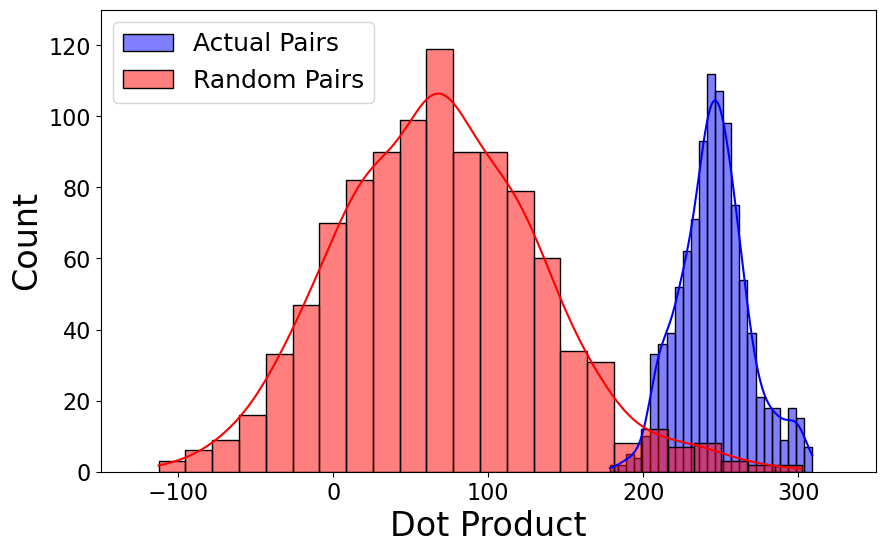

In [9]:
# Simulate the process with a much smaller subset due to computational constraints
num_samples = 1000  # Example: Adjust based on your system's capabilities
random_seed= 42
# Randomly sample rows from cleaned_data
sampled_data = cleaned_data.sample(n=num_samples, random_state=random_seed)

# Compute dot products for actual pairs
actual_dot_products = np.array([np.dot(a, b) for a, b in zip(sampled_data['eq_emb'], sampled_data['text_emb'])])

# Compute dot products for random pairs by shuffling one column
shuffled_text_emb = sampled_data['text_emb'].sample(frac=1).reset_index(drop=True)
random_dot_products = np.array([np.dot(a, b) for a, b in zip(sampled_data['eq_emb'], shuffled_text_emb)])

# Compare distributions using a histogram or similar visualization
plt.figure(figsize=(10, 6))
sns.histplot(actual_dot_products, color='blue', label='Actual Pairs', kde=True)
sns.histplot(random_dot_products, color='red', label='Random Pairs', kde=True)
# set x range as -150 to 350
plt.xlim(-150, 350)
plt.ylim(0, 130)  # Adjust this range as needed

# adjust tick font sizes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Dot Product', fontsize=24)
plt.ylabel('Count', fontsize=24)
# plt.title('Comparison of Dot Products for Actual vs. Random Pairs')
plt.legend(fontsize=18)

# save plot
plt.savefig(f'contrastive/trained_eval_gnoc_dist_num{num_samples}_seed{random_seed}.png', dpi=300, bbox_inches='tight')

Text(95.72222222222221, 0.5, 'Text Embedding')

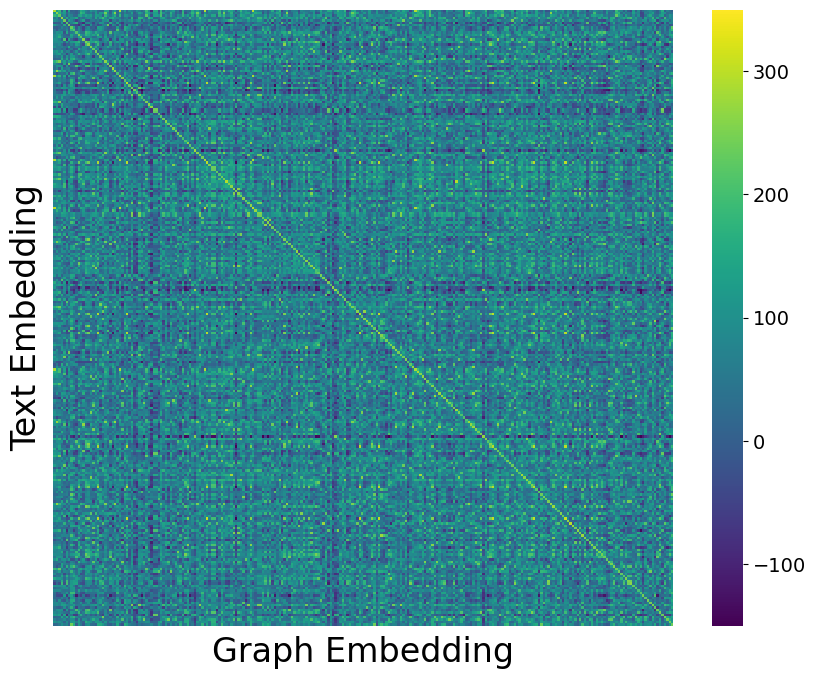

In [10]:
# Example: Sample a smaller subset due to computational constraints
num_samples = 256  # Adjust based on your computational environment
random_seed = 42
sampled_data = cleaned_data.sample(n=num_samples, random_state=random_seed)

# Assuming eq_emb and text_emb are already in the correct numerical format
# If not, you would first need to convert them from strings or lists as shown in previous examples

# Initialize an empty matrix for the dot products
dot_product_matrix = np.zeros((num_samples, num_samples))

# Compute the dot product matrix
for i in range(num_samples):
    for j in range(num_samples):
        dot_product_matrix[i, j] = np.dot(sampled_data.iloc[i]['eq_emb'], sampled_data.iloc[j]['text_emb'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dot_product_matrix, cmap='viridis',vmin=-150, vmax=350)
# remove tick labels
plt.xticks([])
plt.yticks([])
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# Adjust color bar tick size
cbar = plt.gcf().axes[-1]  # Get color bar axis
cbar.tick_params(labelsize=14)  # Set tick size
# plt.title('Heatmap of Dot Products between eq_emb and text_emb')
plt.xlabel('Graph Embedding', fontsize=24)
plt.ylabel('Text Embedding', fontsize=24)
# plt.show()

# save plot
plt.savefig(f'contrastive/eval_gnoc_heatmap_num{num_samples}_seed{random_seed}.png', dpi=300, bbox_inches='tight')

In [18]:
dot_product_matrix

array([[ 44.61061096,  45.557621  ,  45.58052826, ...,  46.7591095 ,
         42.36334991,  44.97846985],
       [ 39.16428375,  39.12914276,  41.32247162, ...,  44.68994141,
         37.86026382,  39.98763275],
       [ 55.46766663,  55.56355286,  56.33670044, ...,  61.55158997,
         54.44791412,  56.78643799],
       ...,
       [ 30.9991684 ,  32.40451431,  35.49763107, ...,  35.9442482 ,
         34.08822632,  32.96276474],
       [ 50.39729691,  49.20741653,  49.9830246 , ...,  50.56511688,
         48.18745804,  50.25704956],
       [ 95.75656891,  94.12266541,  95.29277039, ..., 103.51158905,
         94.9573822 ,  94.74308014]])